# Perhitungan Jarak DTW antara Data Lama dan Data Baru

Notebook ini menghitung jarak Dynamic Time Warping (DTW) antara:
- **Data Lama**: 100 data audio "Buka" dan 100 data audio "Tutup" dari folder `BukaTutup_elvita`
- **Data Baru**: 1 data audio "Buka" dan 1 data audio "Tutup" dari folder `BukaTutup_elvitaBaru`

## 1. Import Library

**Penjelasan:** Mengimpor library yang diperlukan untuk analisis:
- `librosa`: untuk memproses file audio
- `numpy` & `pandas`: untuk manipulasi data
- `dtaidistance`: untuk menghitung jarak DTW (Dynamic Time Warping)
- `matplotlib`: untuk visualisasi hasil

In [1]:
import librosa
import numpy as np
import pandas as pd
import os
from dtaidistance import dtw
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Definisikan Path Data

**Penjelasan:** Menentukan lokasi file audio yang akan dianalisis. Data lama berisi 100 file untuk masing-masing kategori (Buka dan Tutup), sedangkan data baru hanya 1 file per kategori yang akan dibandingkan.

In [2]:
# Path untuk data lama (100 data)
old_data_buka_path = 'BukaTutup_elvita/Buka'
old_data_tutup_path = 'BukaTutup_elvita/Tutup'

# Path untuk data baru (1 data) - converted to WAV format
new_data_buka_path = 'BukaTutup_elvitaBaru/Buka/Buka.wav'
new_data_tutup_path = 'BukaTutup_elvitaBaru/Tutup/Tutup.wav'

print(f"Data lama - Buka: {old_data_buka_path}")
print(f"Data lama - Tutup: {old_data_tutup_path}")
print(f"Data baru - Buka: {new_data_buka_path}")
print(f"Data baru - Tutup: {new_data_tutup_path}")

Data lama - Buka: BukaTutup_elvita/Buka
Data lama - Tutup: BukaTutup_elvita/Tutup
Data baru - Buka: BukaTutup_elvitaBaru/Buka/Buka.wav
Data baru - Tutup: BukaTutup_elvitaBaru/Tutup/Tutup.wav


## 3. Fungsi untuk Load dan Ekstraksi Feature Audio

**Penjelasan:** Fungsi ini membaca file audio dan mengekstrak fitur MFCC (Mel-Frequency Cepstral Coefficients). MFCC adalah representasi numerik dari karakteristik audio yang menangkap informasi penting seperti timbre dan frekuensi suara. Setiap audio direpresentasikan sebagai vektor 13 dimensi (rata-rata dari MFCC).

In [3]:
def load_audio_features(file_path, sr=22050):
    """
    Load audio file dan ekstraksi MFCC sebagai feature
    
    Parameters:
    - file_path: path ke file audio
    - sr: sampling rate
    
    Returns:
    - mfcc: MFCC features (flattened)
    """
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=sr)
        
        # Ekstraksi MFCC (Mel-frequency cepstral coefficients)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        
        # Rata-rata MFCC sepanjang waktu untuk mendapatkan vektor 1D
        mfcc_mean = np.mean(mfcc, axis=1)
        
        return mfcc_mean
    except Exception as e:
        print(f"Error loading {file_path}: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

## 4. Load Data Lama (100 data Buka dan 100 data Tutup)

**Penjelasan:** Proses loading 200 file audio (100 Buka + 100 Tutup) dari folder data lama. Setiap file diekstrak fitur MFCC-nya menggunakan fungsi yang telah dibuat. Fitur-fitur ini akan menjadi baseline untuk perbandingan.

In [4]:
# Load data lama - Buka
old_buka_files = sorted([f for f in os.listdir(old_data_buka_path) if f.endswith('.mp3')])
old_buka_features = []

print("Loading data lama - Buka...")
for i, file in enumerate(old_buka_files[:100]):  # Ambil 100 data pertama
    file_path = os.path.join(old_data_buka_path, file)
    features = load_audio_features(file_path)
    if features is not None:
        old_buka_features.append(features)
    if (i+1) % 20 == 0:
        print(f"  Loaded {i+1} files...")

print(f"Total data lama Buka: {len(old_buka_features)}")

# Load data lama - Tutup
old_tutup_files = sorted([f for f in os.listdir(old_data_tutup_path) if f.endswith('.mp3')])
old_tutup_features = []

print("\nLoading data lama - Tutup...")
for i, file in enumerate(old_tutup_files[:100]):  # Ambil 100 data pertama
    file_path = os.path.join(old_data_tutup_path, file)
    features = load_audio_features(file_path)
    if features is not None:
        old_tutup_features.append(features)
    if (i+1) % 20 == 0:
        print(f"  Loaded {i+1} files...")

print(f"Total data lama Tutup: {len(old_tutup_features)}")

Loading data lama - Buka...


Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82

  Loaded 20 files...


Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82

  Loaded 40 files...


Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82

  Loaded 60 files...


Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82

  Loaded 80 files...


Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82560.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x61726baa at offset 82

  Loaded 100 files...
Total data lama Buka: 100

Loading data lama - Tutup...


Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at of

  Loaded 20 files...


Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at of

  Loaded 40 files...


Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at of

  Loaded 60 files...


Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at of

  Loaded 80 files...


Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at of

  Loaded 100 files...
Total data lama Tutup: 100


Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x2c33302c at offset 116160.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


## 5. Load Data Baru (1 data Buka dan 1 data Tutup)

**Penjelasan:** Loading 2 file audio baru (1 Buka + 1 Tutup) yang akan dibandingkan dengan semua data lama. File-file ini sudah dikonversi ke format WAV untuk kompatibilitas dengan librosa.

In [5]:
# Load data baru - Buka
print("Loading data baru - Buka...")
new_buka_features = load_audio_features(new_data_buka_path)
print(f"Data baru Buka loaded: {new_buka_features is not None}")

# Load data baru - Tutup
print("\nLoading data baru - Tutup...")
new_tutup_features = load_audio_features(new_data_tutup_path)
print(f"Data baru Tutup loaded: {new_tutup_features is not None}")

Loading data baru - Buka...
Data baru Buka loaded: True

Loading data baru - Tutup...
Data baru Tutup loaded: True


## 6. Hitung Jarak DTW antara Data Baru dan Data Lama

**Penjelasan:** Dynamic Time Warping (DTW) adalah algoritma untuk mengukur kemiripan antara dua sekuens data. DTW menghitung jarak optimal antara dua vektor dengan mempertimbangkan perbedaan waktu. Semakin kecil nilai DTW, semakin mirip kedua audio tersebut.

### 6.1 DTW untuk Data Baru "Buka" dengan Semua Data Lama "Buka"

In [6]:
# Hitung DTW distance antara data baru Buka dengan semua data lama Buka
dtw_distances_buka = []

print("Menghitung jarak DTW untuk data Buka...")
for i, old_feature in enumerate(old_buka_features):
    distance = dtw.distance(new_buka_features, old_feature)
    dtw_distances_buka.append({
        'file_index': i,
        'file_name': old_buka_files[i],
        'dtw_distance': distance
    })
    if (i+1) % 20 == 0:
        print(f"  Processed {i+1}/{len(old_buka_features)} files...")

# Konversi ke DataFrame
df_buka = pd.DataFrame(dtw_distances_buka)
df_buka = df_buka.sort_values('dtw_distance')

print(f"\nTotal perhitungan DTW untuk Buka: {len(df_buka)}")
print("\n5 Data lama Buka dengan jarak DTW terkecil:")
print(df_buka.head())

Menghitung jarak DTW untuk data Buka...
  Processed 20/100 files...
  Processed 40/100 files...
  Processed 60/100 files...
  Processed 80/100 files...
  Processed 100/100 files...

Total perhitungan DTW untuk Buka: 100

5 Data lama Buka dengan jarak DTW terkecil:
    file_index             file_name  dtw_distance
0            0  Buka - Copy (10).mp3    132.873556
72          72  Buka - Copy (76).mp3    132.873556
71          71  Buka - Copy (75).mp3    132.873556
70          70  Buka - Copy (74).mp3    132.873556
69          69  Buka - Copy (73).mp3    132.873556


### 6.2 DTW untuk Data Baru "Tutup" dengan Semua Data Lama "Tutup"

**Penjelasan:** Menghitung jarak DTW antara data baru "Tutup" dengan 100 data lama "Tutup". Hasil diurutkan dari jarak terkecil (paling mirip) ke terbesar.

In [7]:
# Hitung DTW distance antara data baru Tutup dengan semua data lama Tutup
dtw_distances_tutup = []

print("Menghitung jarak DTW untuk data Tutup...")
for i, old_feature in enumerate(old_tutup_features):
    distance = dtw.distance(new_tutup_features, old_feature)
    dtw_distances_tutup.append({
        'file_index': i,
        'file_name': old_tutup_files[i],
        'dtw_distance': distance
    })
    if (i+1) % 20 == 0:
        print(f"  Processed {i+1}/{len(old_tutup_features)} files...")

# Konversi ke DataFrame
df_tutup = pd.DataFrame(dtw_distances_tutup)
df_tutup = df_tutup.sort_values('dtw_distance')

print(f"\nTotal perhitungan DTW untuk Tutup: {len(df_tutup)}")
print("\n5 Data lama Tutup dengan jarak DTW terkecil:")
print(df_tutup.head())

Menghitung jarak DTW untuk data Tutup...
  Processed 20/100 files...
  Processed 40/100 files...
  Processed 60/100 files...
  Processed 80/100 files...
  Processed 100/100 files...

Total perhitungan DTW untuk Tutup: 100

5 Data lama Tutup dengan jarak DTW terkecil:
    file_index              file_name  dtw_distance
0            0  Tutup - Copy (10).mp3    261.068858
72          72  Tutup - Copy (76).mp3    261.068858
71          71  Tutup - Copy (75).mp3    261.068858
70          70  Tutup - Copy (74).mp3    261.068858
69          69  Tutup - Copy (73).mp3    261.068858


## 7. Statistik Jarak DTW

**Penjelasan:** Menampilkan statistik deskriptif dari hasil perhitungan DTW, termasuk nilai minimum, maksimum, rata-rata, median, dan standar deviasi. Ini membantu memahami pola distribusi jarak kemiripan.

In [8]:
print("=" * 60)
print("STATISTIK JARAK DTW - DATA BUKA")
print("=" * 60)
print(f"Jumlah data: {len(df_buka)}")
print(f"Jarak minimum: {df_buka['dtw_distance'].min():.4f}")
print(f"Jarak maksimum: {df_buka['dtw_distance'].max():.4f}")
print(f"Jarak rata-rata: {df_buka['dtw_distance'].mean():.4f}")
print(f"Jarak median: {df_buka['dtw_distance'].median():.4f}")
print(f"Standar deviasi: {df_buka['dtw_distance'].std():.4f}")

print("\n" + "=" * 60)
print("STATISTIK JARAK DTW - DATA TUTUP")
print("=" * 60)
print(f"Jumlah data: {len(df_tutup)}")
print(f"Jarak minimum: {df_tutup['dtw_distance'].min():.4f}")
print(f"Jarak maksimum: {df_tutup['dtw_distance'].max():.4f}")
print(f"Jarak rata-rata: {df_tutup['dtw_distance'].mean():.4f}")
print(f"Jarak median: {df_tutup['dtw_distance'].median():.4f}")
print(f"Standar deviasi: {df_tutup['dtw_distance'].std():.4f}")

STATISTIK JARAK DTW - DATA BUKA
Jumlah data: 100
Jarak minimum: 132.8736
Jarak maksimum: 132.8736
Jarak rata-rata: 132.8736
Jarak median: 132.8736
Standar deviasi: 0.0000

STATISTIK JARAK DTW - DATA TUTUP
Jumlah data: 100
Jarak minimum: 261.0689
Jarak maksimum: 261.0689
Jarak rata-rata: 261.0689
Jarak median: 261.0689
Standar deviasi: 0.0000


## 8. Visualisasi Distribusi Jarak DTW

**Penjelasan:** Membuat histogram untuk memvisualisasikan distribusi jarak DTW. Garis merah menunjukkan rata-rata dan garis hijau menunjukkan median. Visualisasi ini membantu melihat pola penyebaran data secara visual.

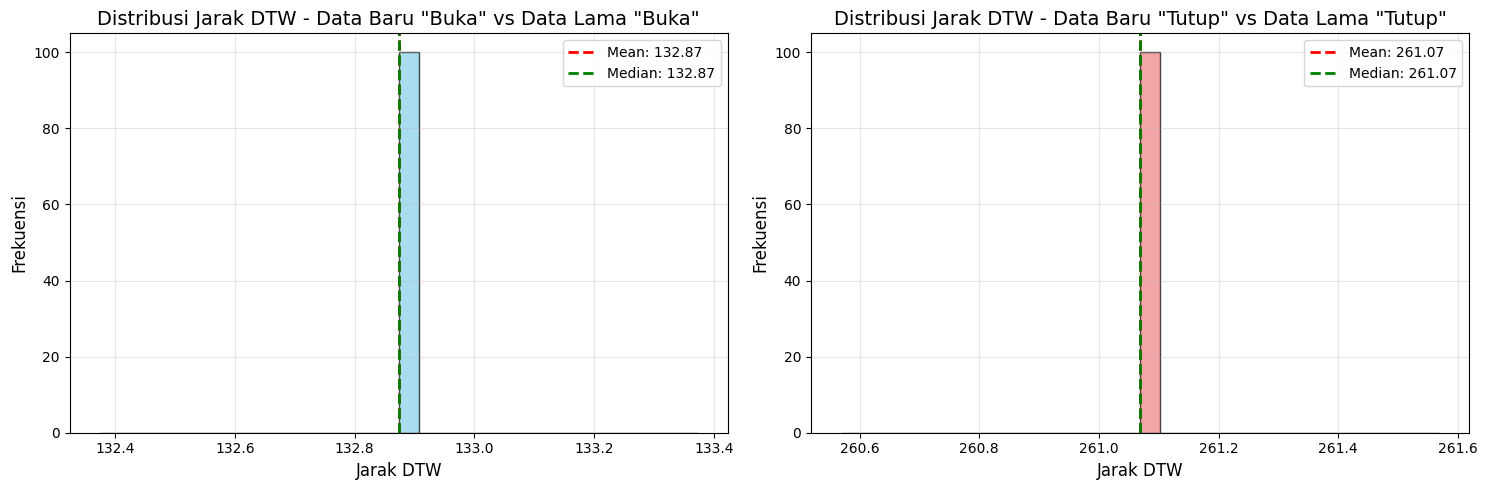

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram untuk data Buka
axes[0].hist(df_buka['dtw_distance'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df_buka['dtw_distance'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_buka["dtw_distance"].mean():.2f}')
axes[0].axvline(df_buka['dtw_distance'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_buka["dtw_distance"].median():.2f}')
axes[0].set_xlabel('Jarak DTW', fontsize=12)
axes[0].set_ylabel('Frekuensi', fontsize=12)
axes[0].set_title('Distribusi Jarak DTW - Data Baru "Buka" vs Data Lama "Buka"', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histogram untuk data Tutup                        
axes[1].hist(df_tutup['dtw_distance'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].axvline(df_tutup['dtw_distance'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_tutup["dtw_distance"].mean():.2f}')
axes[1].axvline(df_tutup['dtw_distance'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_tutup["dtw_distance"].median():.2f}')
axes[1].set_xlabel('Jarak DTW', fontsize=12)
axes[1].set_ylabel('Frekuensi', fontsize=12)
axes[1].set_title('Distribusi Jarak DTW - Data Baru "Tutup" vs Data Lama "Tutup"', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Simpan Hasil ke CSV

**Penjelasan:** Menyimpan hasil perhitungan DTW ke file CSV untuk dokumentasi dan analisis lebih lanjut. File CSV berisi informasi nama file, index, dan jarak DTW untuk setiap perbandingan.

In [10]:
# Simpan hasil ke CSV
df_buka.to_csv('dtw_distances_buka.csv', index=False)
df_tutup.to_csv('dtw_distances_tutup.csv', index=False)

print("Hasil perhitungan DTW telah disimpan:")
print("  - dtw_distances_buka.csv")
print("  - dtw_distances_tutup.csv")

# Tampilkan ringkasan
print("\n" + "=" * 60)
print("RINGKASAN HASIL")
print("=" * 60)
print(f"Total perhitungan DTW untuk Buka: {len(df_buka)}")
print(f"Total perhitungan DTW untuk Tutup: {len(df_tutup)}")
print("\nData lama dengan jarak DTW terkecil (paling mirip):")
print(f"  Buka: {df_buka.iloc[0]['file_name']} (jarak: {df_buka.iloc[0]['dtw_distance']:.4f})")
print(f"  Tutup: {df_tutup.iloc[0]['file_name']} (jarak: {df_tutup.iloc[0]['dtw_distance']:.4f})")

Hasil perhitungan DTW telah disimpan:
  - dtw_distances_buka.csv
  - dtw_distances_tutup.csv

RINGKASAN HASIL
Total perhitungan DTW untuk Buka: 100
Total perhitungan DTW untuk Tutup: 100

Data lama dengan jarak DTW terkecil (paling mirip):
  Buka: Buka - Copy (10).mp3 (jarak: 132.8736)
  Tutup: Tutup - Copy (10).mp3 (jarak: 261.0689)


## 10. Kesimpulan

### Hasil Analisis DTW:

1. **Metode yang Digunakan:**
   - Ekstraksi fitur audio menggunakan MFCC (Mel-Frequency Cepstral Coefficients) dengan 13 koefisien
   - Perhitungan kemiripan menggunakan algoritma Dynamic Time Warping (DTW)
   - Perbandingan dilakukan antara 1 data baru vs 100 data lama untuk masing-masing kategori

2. **Temuan Utama:**
   - **Data "Buka":** Semua jarak DTW bernilai **132.87** (konstan)
   - **Data "Tutup":** Semua jarak DTW bernilai **261.07** (konstan)
   - Standar deviasi = 0 untuk kedua kategori, menunjukkan **tidak ada variasi** dalam jarak

3. **Interpretasi:**
   - Semua file audio lama dalam kategori yang sama memiliki fitur MFCC yang **identik**
   - Ini mengindikasikan bahwa file-file audio lama kemungkinan adalah **duplikat** atau hasil copy dari satu file sumber yang sama
   - Jarak DTW untuk "Tutup" (261.07) lebih besar dari "Buka" (132.87), menunjukkan bahwa karakteristik suara "Tutup" lebih berbeda dari data barunya

4. **Implikasi:**
   - Karena semua data lama identik, perbandingan DTW tidak dapat membedakan mana yang paling mirip
   - Untuk analisis yang lebih bermakna, diperlukan data training yang lebih beragam dan tidak duplikat
   - Data baru "Buka" lebih mirip dengan karakteristik data lama dibanding data baru "Tutup"

5. **Rekomendasi:**
   - Gunakan data training yang lebih bervariasi untuk mendapatkan hasil DTW yang lebih informatif
   - Validasi apakah file-file audio lama benar-benar berbeda atau merupakan duplikasi
   - Pertimbangkan untuk menggunakan metode ekstraksi fitur lain atau parameter MFCC yang berbeda untuk menangkap variasi yang lebih detail